In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from auto_encoder import AutoEncoder
from stacked_mnist import StackedMNISTData, DataMode
import numpy as np
import matplotlib.pyplot as plt
from verification_net import VerificationNet
from utils import display_images

# Setting up model

In [8]:
auto_encoder = AutoEncoder(latent_dim=20)
auto_encoder.model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 48)          13872     
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 64)          27712     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 20)                2580

In [48]:
auto_encoder.train(force_relearn=False)

./models/ae
False
Read model from file, so I do not retrain


# Mono images

In [49]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

### Reconstruction results

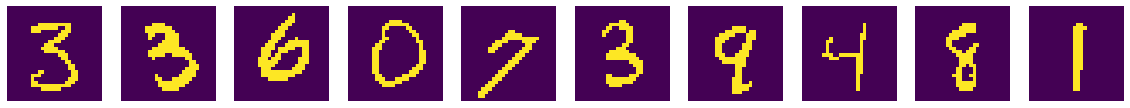

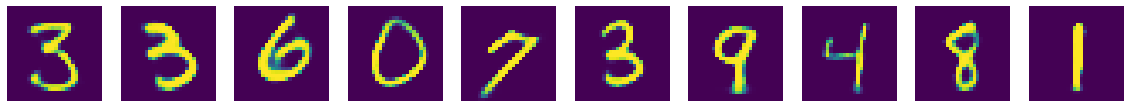

In [50]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10)
display_images(reconstructed, 10)

In [51]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")


/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy of Reconstruction: 97.00%


### Auto-Encoder as a generator

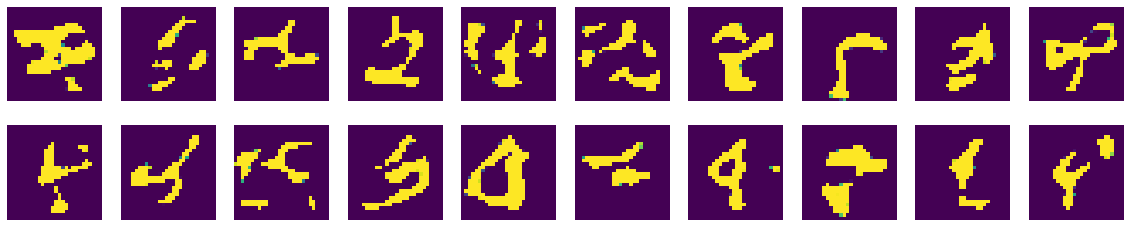

In [52]:
generated = auto_encoder.generate_new_samples(1, 100, z_scale=100)
display_images(generated, 20)

In [53]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 70.00%
Predictability: 58.00%


# Color images

In [28]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

### Reconstruction results

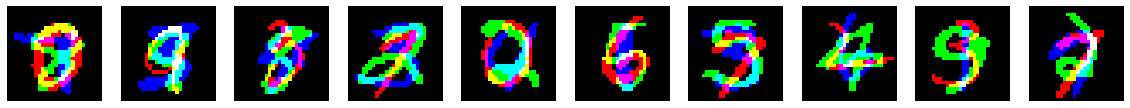

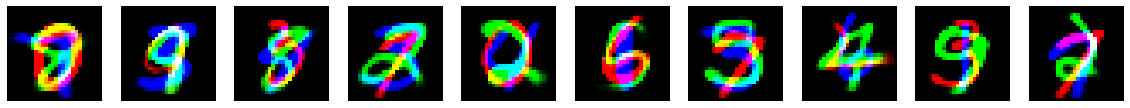

In [29]:
reconstructed = auto_encoder.reconstruct(x_test)

display_images(x_test, 10, color=True)
display_images(reconstructed, 10, color=True)

In [30]:
net = VerificationNet(force_learn=False, file_name="../models/verification_model")
_, acc_ae = net.check_predictability(data=reconstructed, correct_labels=y_test, tolerance=0.5)
print(f"Accuracy of Reconstruction: {100 * acc_ae:.2f}%")

/usr/local/anaconda3/envs/tensorflow/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Accuracy of Reconstruction: 90.05%


### Auto-Encoder as a generator

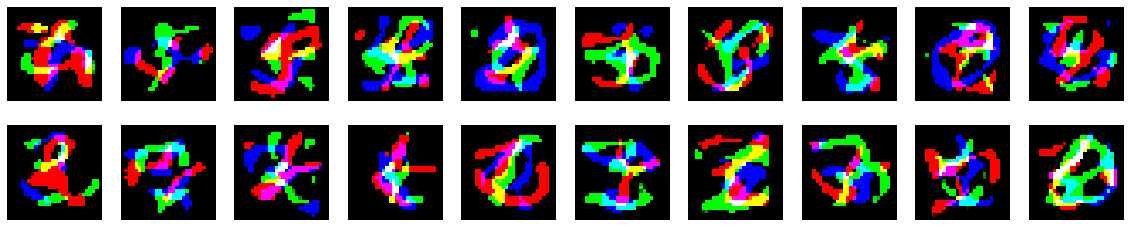

In [57]:
generated = auto_encoder.generate_new_samples(3, 1000, z_scale=100)
display_images(generated, 20, color=True)

In [58]:
cov = net.check_class_coverage(data=generated, tolerance=0.98)
pred, _ = net.check_predictability(data=generated)
print(f"Coverage: {100*cov:.2f}%")
print(f"Predictability: {100*pred:.2f}%")

Coverage: 0.80%
Predictability: 11.20%


# Auto-Encoder as anomaly detector

In [54]:
ae_anomaly = AutoEncoder(latent_dim=20, missing=True)
ae_anomaly.train(force_relearn=False)

./models/ae_missing
True
Read model from file, so I do not retrain


### Mono images

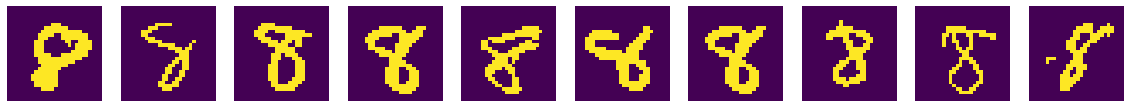

In [56]:
generator = StackedMNISTData(mode=DataMode.MONO_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10)

### Color images

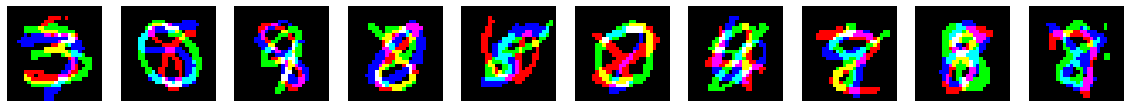

In [35]:
generator = StackedMNISTData(mode=DataMode.COLOR_BINARY_COMPLETE, default_batch_size=2048)
x_test, y_test = generator.get_random_batch(training=False, batch_size=2000)
x_test = x_test.astype(np.float64)

anomalies = ae_anomaly.get_anomalies(x_test)
display_images(x_test[anomalies], 10, color=True)